# Human Cell Lines

In [1]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama

In [2]:
adata = cr.read('../../out/cell-lines/adata_no_doublets_02.h5ad')


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


In [3]:
adata

AnnData object with n_obs × n_vars = 13945 × 20446
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_scores_ind', 'predicted_doublets_ind', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff', 'score'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_

In [4]:
X_magic = cr.read('../../out/cell-lines/X_magic_no_doublets_02.h5ad')
X_magic

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


AnnData object with n_obs × n_vars = 13945 × 20446
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_scores_ind', 'predicted_doublets_ind', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_cou

In [5]:
adata.layers['imputed'] = X_magic.X
adata.obsm['X_pca_imputed'] = X_magic.obsm['X_pca']

In [6]:
adata.write_h5ad('../../out/cell-lines/adata_03.h5ad')

# Subtyping with Archetype Signatures

In [2]:
adata = cr.read('../../out/cell-lines/adata_03.h5ad')

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


## Using Mazebox to generate archetype scores

In [3]:
sig_matrix = pd.read_csv('../../out/bulk/sig_matrix_ParTI_2021.csv', header =0, index_col = 0)

sig_matrix = sig_matrix / np.linalg.norm(sig_matrix, axis=0)


In [4]:
# import seaborn as sns
# max_subtype = []
# max_v = []
# sig_matrix_copy = sig_matrix.copy()
# for i,r in sig_matrix.iterrows():
#     maxi = r.idxmax()
#     maxv = r.max()
#     max_subtype.append(maxi) 
#     max_v.append(maxv)
# sig_matrix_copy['max_subtype'] = max_subtype
# sig_matrix_copy['max'] = max_v

# plt.figure(figsize=(5,30))
# sig_matrix_copy = sig_matrix_copy.sort_values(by = ['max_subtype','max'], ascending=[True, False])
# sig_matrix_copy = sig_matrix_copy[['SCLC-A','SCLC-A2','SCLC-N','SCLC-P','SCLC-Y']]
# sns.heatmap(sig_matrix_copy, cmap='viridis', yticklabels = True)
# plt.xticks(rotation = 90)
# plt.title(f'Log-transformed Archetype Expression Profiles')
# plt.tight_layout()
# # plt.savefig(op.join(outdir,f'figures/Archetypes/sig_matrix_logfc.pdf'))
# plt.show()
# plt.close()

# sig_matrix_copy.to_csv('../data/sig_matrix_ParTI.csv')

If the below code gives an error about data shape, use `type = 'csr'`.

Cells with zero expression for all genes in gene signature will get scores of NaN when assigning scores in adata.obs (because these cells are filtered for the calculation). 

Trying to set attribute `.obs` of view, copying.


Transforming tumor data...
Gene signature matrix now has shape:  (99, 5)
Tumor data shortened to genes in gene list...
(13883, 99)
Tumor data subsetting complete.


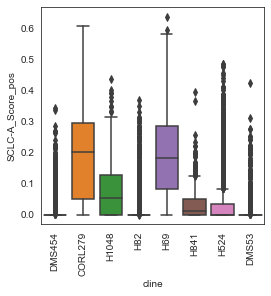

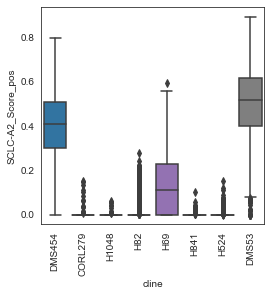

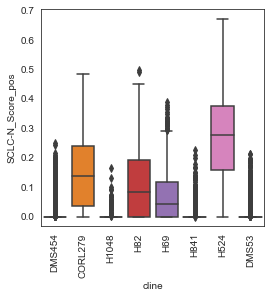

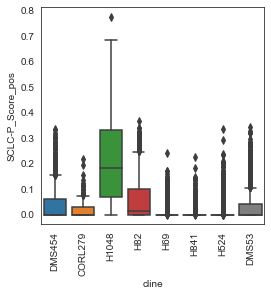

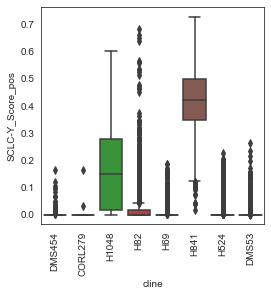

In [5]:
adata, adata_small, sig_matrix2 = mb.ar.phenotyping_recipe(adata, sig_matrix, groupby = 'cline',velocity=False)


In [6]:
from sklearn.manifold import LocallyLinearEmbedding
def _archetype_diagram_no_arrows(_adata, score_name, color, figsize, order, multiplier,fname,
                                 sizes = None, alpha = .3, s = 30, color_dict = None, norm = 'scale'):
    # X = subtype scores for each subtype (pd dataframe)
    n_samples = len(_adata.obs_names)

    n_types = len(sig_matrix.columns)
    subtypes = sig_matrix.columns
    X = _adata.obs[[f"{x}{score_name}" for x in subtypes]]
    top = X.sum().sort_values(ascending=False)[:3]  # return a list of n largest element
    print(top.index)

    # normalize X to sum to 1 (makes sure that the data fits within the archetype diagram with I matrix = vertices
    X_norm = pd.DataFrame(columns=X.columns)
    if norm == 'scale':
        for i, r in X.iterrows():
            if r.sum() == 0:
                X_norm = X_norm.append(r)
            else:
                X_norm = X_norm.append(r / r.sum())
    elif norm == 'max':
        max = X.max().max()
        X_norm = X / max
    elif norm == 'None':
        X_norm = X

    X = X_norm.fillna(0)
    if type(order) != type(None):
        X = X[[f"{x}{score_name}" for x in order]]
        subtypes = order
    else:
        order = subtypes

    ident = np.identity(n_types)
    for i, x in enumerate(subtypes):
        X = X.append(pd.DataFrame(np.array(ident[i]), index=X.columns, columns=[x]).T)

    embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=4, method='modified', eigen_solver='dense')
    X_transformed = embedding.fit_transform(X[-n_types:])
    X_transformed = X_transformed.T

    X_df_data = embedding.transform(X[:-n_types])
    X_df_data = X_df_data.T

    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot()
    colors = _adata.obs[color].values
    if type(colors[0]) == str:
        c = [color_dict[i] for i in colors]
    else:
        c = colors
    plt.scatter(X_df_data[0], X_df_data[1], c=c, zorder=1, alpha=alpha, s=s)
    if type(sizes) == int:
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    else:
        sizes = [Counter(colors)[i] * multiplier / n_samples for i in order]
        print(sizes)
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                zorder=2, s=sizes)
    plt.axis('tight')
    plt.savefig(f'./figures/{fname}.pdf')
    plt.show()
    plt.close()
    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot()
    colors = _adata.obs[color].values
    if type(colors[0]) == str:
        c = [color_dict[i] for i in colors]
    else:
        c = colors
    sns.kdeplot(X_df_data[0], X_df_data[1], cmap="Reds", shade=True, bw=.15)
    if type(sizes) == int:
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    else:
        sizes = [Counter(colors)[i] * multiplier / n_samples for i in order]
        print(sizes)
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    plt.axis('tight')
    plt.show()
    plt.close()


Index(['SCLC-A2_Score', 'SCLC-N_Score', 'SCLC-Y_Score'], dtype='object')


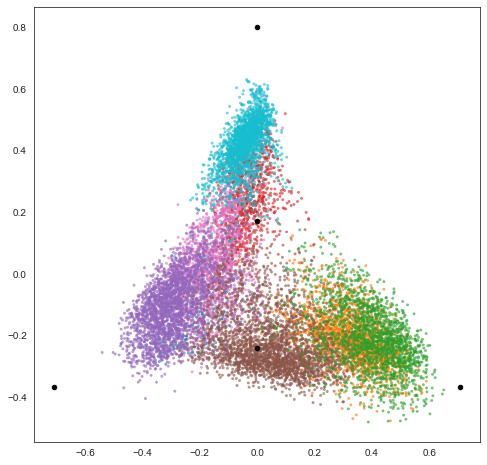

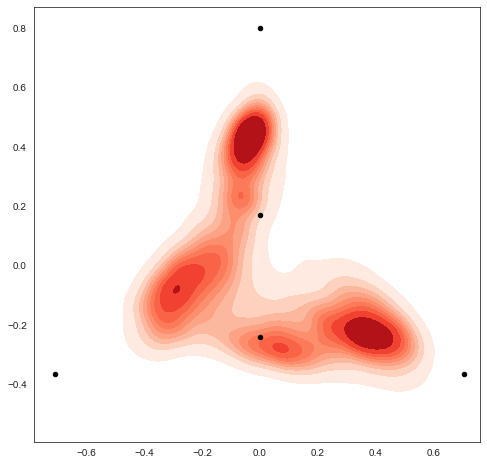

In [8]:
color_dict = {}
for i,c in enumerate(sorted(list(set(adata_small.obs['cline'])))):
    if i == 7:     color_dict[c] = sns.color_palette('tab10')[9] #skip grey
    else:
        color_dict[c] = sns.color_palette('tab10',8)[i]
cmap = 'jet'
_archetype_diagram_no_arrows(adata_small, color_dict=color_dict,color='cline',fname = 'cline_archetype_space',
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',
                        multiplier=1, figsize=(8,8), score_name = '_Score', alpha = .5, s = 4, sizes = 20)


## Newer phenotype classification with labeled generalists
Let's check to see how many samples have significant scores (p>.3) for more than one phenotype.

<BarContainer object of 3 artists>

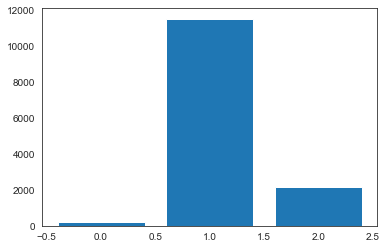

In [9]:
df = adata.obs[[f"{x}_Score_pos" for x in ['SCLC-N', 'SCLC-A', 'SCLC-P', 'SCLC-Y', 'SCLC-A2']]]
# np.unique((df > .3).sum(axis = 1), return_counts=True)[1]
plt.bar(height = np.unique(((df.T/df.sum(axis = 1)).T > .33).sum(axis = 1), return_counts=True)[1], x = range(3), log=False)

In [10]:
arc_pheno = []
arc_aa_type = []

for i,r in df.iterrows():
    r = r/r.sum()
    if (r > .33).sum() > 1:
        arc_aa_type.append('Generalist')
        arc_pheno.append(r.sort_values(ascending=False)[0:2].sort_index().index[0].split('_')[0]+"_"+r.sort_values(ascending=False)[0:2].sort_index().index[1].split('_')[0])
    elif  (r > .33).sum() == 1:
        try:
            arc_aa_type.append(r.idxmax().split('_')[0]+" Specialist")
            arc_pheno.append(r.idxmax().split('_')[0])
        except AttributeError: 
            arc_aa_type.append("Unclassified")
            arc_pheno.append("Unclassified")
    else: 
        arc_aa_type.append("Unclassified")
        arc_pheno.append("Unclassified")
adata.obs['arc_pheno'] = arc_pheno
adata.obs['arc_aa_type'] = arc_aa_type


In [12]:
pd.crosstab(adata.obs['arc_pheno'],adata.obs['cline']).style.background_gradient(cmap='viridis')

In [13]:
pd.crosstab( adata.obs['arc_pheno'],adata.obs['Phenotype']).style.background_gradient(cmap='viridis')

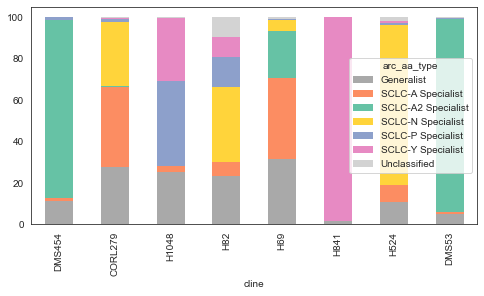

In [14]:
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y Specialist': cp[4], 'SCLC-A Specialist': cp[0], 'SCLC-A2 Specialist': cp[1], 'SCLC-N Specialist': cp[2], 'SCLC-P Specialist': cp[3],
              'Generalist': 'darkgrey', 'Unclassified': 'lightgrey'}
mb.pl.subtype_bar(adata,groupby='cline', fname = 'cline', pheno_name="arc_aa_type", custom_palette=color_dict)

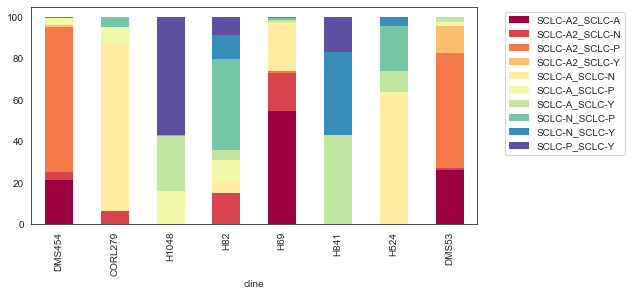

In [16]:
_adata = adata[adata.obs['arc_aa_type'] == 'Generalist']
plt.rcParams["figure.figsize"] = [8, 4]
((pd.crosstab(_adata.obs["cline"], _adata.obs['arc_pheno']).T /
  pd.crosstab(_adata.obs["cline"], _adata.obs['arc_pheno']).sum(axis=1)) * 100).T.plot(kind='bar',
                                                                                              stacked=True,
                                                                                              linewidth=0, cmap = 'Spectral')
plt.legend(bbox_to_anchor=(1.05, 1))

plt.savefig('./figures/arc_aa_generalist_subtypes.pdf')

In [18]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 300
# mb.pl.archetype_diagrams(adata, sig_matrix, color_dict=color_dict, groupby='cline',color = 'arc_aa_type',
#                         order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',sizes = 20,
#                         figsize=(4,4), score_name = '_Score', alpha = .8, s = 8, arrows = False)


In [19]:
np.unique(adata.obs['arc_pheno'], return_counts=True)

(array(['SCLC-A', 'SCLC-A2', 'SCLC-A2_SCLC-A', 'SCLC-A2_SCLC-N',
        'SCLC-A2_SCLC-P', 'SCLC-A2_SCLC-Y', 'SCLC-A_SCLC-N',
        'SCLC-A_SCLC-P', 'SCLC-A_SCLC-Y', 'SCLC-N', 'SCLC-N_SCLC-P',
        'SCLC-N_SCLC-Y', 'SCLC-P', 'SCLC-P_SCLC-Y', 'SCLC-Y',
        'Unclassified'], dtype=object),
 array([1580, 4086,  556,  239,  216,   14,  436,  103,  131, 2654,  242,
          73,  706,  174, 2499,  236]))

In [20]:
adata.write_h5ad('../../out/cell-lines/adata_03.h5ad')



... storing 'Phenotype' as categorical
... storing 'arc_pheno' as categorical
... storing 'arc_aa_type' as categorical


## Plotly ternary plots

In [2]:
adata = sc.read_h5ad('../int/clines/adata03.h5ad')


In [ ]:
adata.obs['SCLC-NE_Score_pos'] = adata.obs['SCLC-NE_Score_pos']+adata.obs['SCLC-A2_Score_pos']+adata.obs['SCLC-N_Score_pos']


In [ ]:

color_map_pheno = {}
import plotly.express as px
for b, c in zip(sorted(list(set(adata.obs.arc_pheno))),px.colors.qualitative.Bold):
    color_map_pheno[b] = c
fig = px.scatter_ternary(adata.obs.sort_values('arc_pheno'), a="SCLC-NE_Score_pos", b="SCLC-P_Score_pos", c="SCLC-Y_Score_pos", color = 'batch', 
                         color_discrete_map=color_map_pheno)
# fig.update_traces(legendgroup={'Specialists':['SCLC-A','SCLC-A2','SCLC-N','SCLC-P','SCLC-Y'],
#                               "Generalists":['SCLC-A_SCLC-A2','SCLC-A2_SCLC-N','SCLC-A_SCLC-N','SCLC-A_SCLC-Y','SCLC-N_SCLC-Y','SCLC-P_SCLC-Y' ]}
#                   , selector=dict(type='scatter'))
# fig.update_layout(legend_traceorder='grouped')
fig.show()
fig = px.scatter_ternary(adata.obs.sort_values('arc_pheno'), a="SCLC-A_Score_pos", b="SCLC-A2_Score_pos", c="SCLC-N_Score_pos", color = 'batch',
                         color_discrete_map=color_map_pheno)
fig.show()

In [ ]:
fig = px.scatter_ternary(adata.obs.sort_values('arc_pheno'), a="SCLC-NE_Score_pos", b="SCLC-P_Score_pos", c="SCLC-Y_Score_pos", color = 'arc_pheno', 
                         color_discrete_map=color_map_pheno)
# fig.update_traces(legendgroup={'Specialists':['SCLC-A','SCLC-A2','SCLC-N','SCLC-P','SCLC-Y'],
#                               "Generalists":['SCLC-A_SCLC-A2','SCLC-A2_SCLC-N','SCLC-A_SCLC-N','SCLC-A_SCLC-Y','SCLC-N_SCLC-Y','SCLC-P_SCLC-Y' ]}
#                   , selector=dict(type='scatter'))
# fig.update_layout(legend_traceorder='grouped')
fig.show()
fig = px.scatter_ternary(adata[adata.obs['SCLC-NE_Score_pos']>.8].obs.sort_values('arc_pheno'), a="SCLC-A_Score_pos", b="SCLC-A2_Score_pos", c="SCLC-N_Score_pos", color = 'arc_pheno',
                         color_discrete_map=color_map_pheno)
fig.show()

In [ ]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(12,4))
p = sns.barplot(y = np.unique(adata.obs['arc_pheno'], return_counts=True)[0], x = (np.unique(adata.obs['arc_pheno'], return_counts=True)[1]),
               )
# p.set(xscale="log")
plt.xlim(.9, max(np.unique(adata.obs['arc_pheno'], return_counts=True)[1])+1000)
plt.xlabel('Number of Cells with Each Phenotype')
plt.show()

In [ ]:
def plot_gene(adata, genes):
    tmp = adata.obs.copy()
    for gene in genes:
        tmp[gene] = adata.obs_vector(gene)
        plt.figure(figsize = (10,8))
        sns.barplot(y = tmp['arc_pheno'], x =tmp[gene], order=tmp.groupby('arc_pheno').mean().sort_values(gene, ascending=False).index)
        plt.title(gene)
        plt.xlabel('Expression (Log1p(Normalized Counts))')
        plt.ylabel('Phenotype')
        plt.show()

In [ ]:
plot_gene(adata, ['ASCL1','POU2F3','MYC','YAP1','SOX1'])

In [ ]:
scv.pl.scatter(adata, basis = 'umap_sc', color = [f"{x}_Score_pos" for x in ['SCLC-N', 'SCLC-A', 'SCLC-P', 'SCLC-Y', 'SCLC-A2']], figsize = (10,10), cmap = 'viridis')


In [ ]:
scv.pl.scatter(adata, basis = 'umap_sc', color = 'arc_pheno', figsize = (5,5), legend_loc = 'on right', palette = 'tab20')
scv.pl.scatter(adata, basis = 'umap_sc', color = 'arc_aa_type', figsize = (5,5), legend_loc = 'on right' )

Keep in mind that the ternary plots are renormalized, so the cell labeled A2, for example, shows up in the middle of the plot because A, N, and Y are renormalized to sum to 1 even though A2 was the highest probability phenotype.

## Doublet detection

In [83]:
mb.pp.doublet_detections(adata, layer = 'matrix')

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 40.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.2%
Elapsed time: 19.9 seconds


In [90]:
adata.obs.groupby('arc_aa_type').sum()['predicted_doublets']

arc_aa_type
Generalist            4
SCLC-A Specialist     0
SCLC-A2 Specialist    4
SCLC-N Specialist     2
SCLC-P Specialist     1
SCLC-Y Specialist     2
Unclassified          1
Name: predicted_doublets, dtype: int64

Index(['SCLC-A2_Score', 'SCLC-N_Score', 'SCLC-P_Score'], dtype='object')


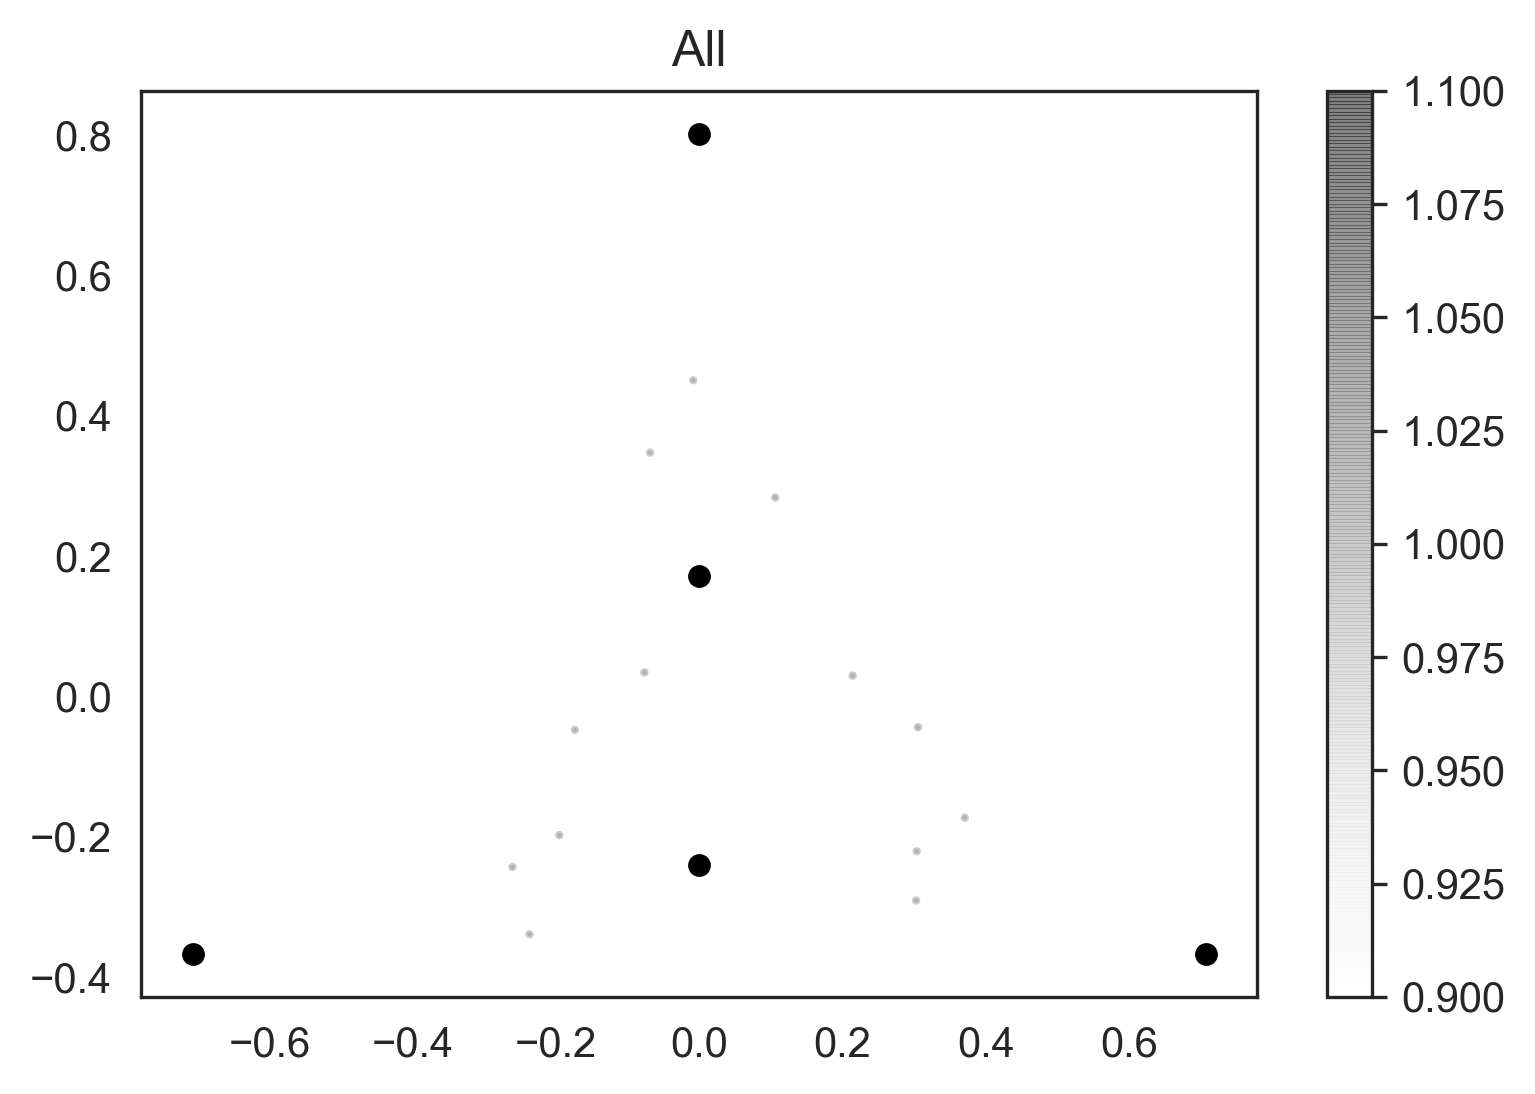

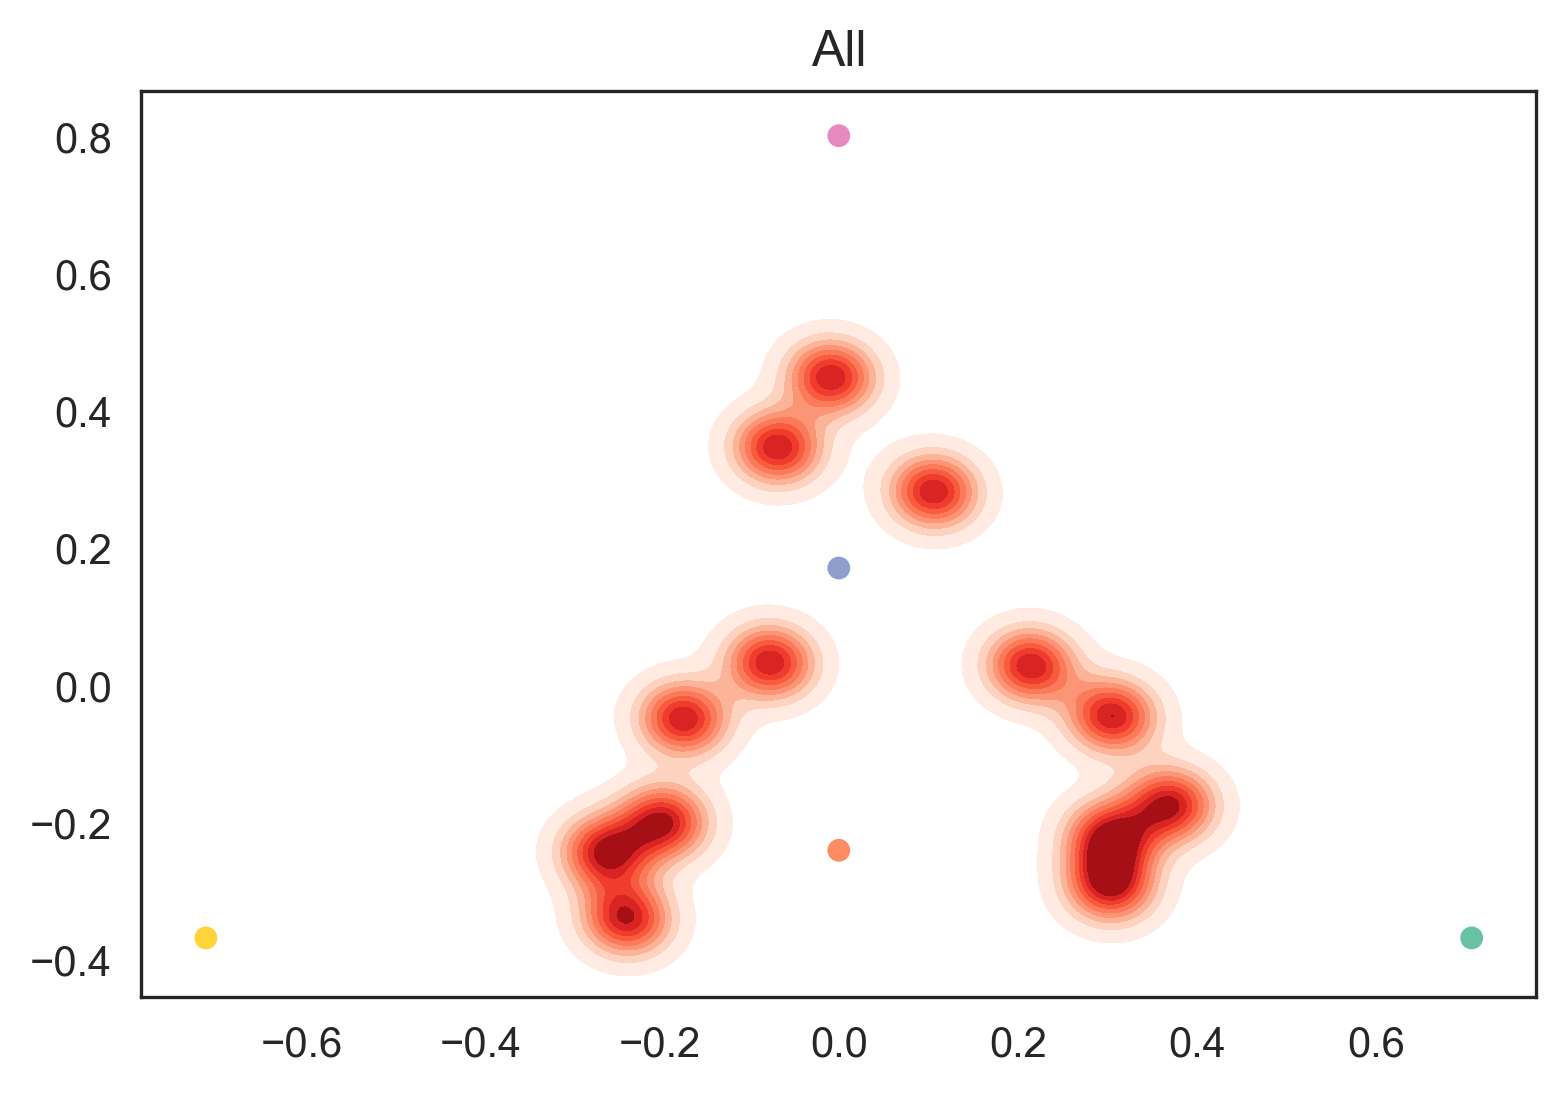

In [7]:
adata_small.obs['doublet_scores'] = adata.obs['doublet_scores']
adata_small.obs['predicted_doublets'] = adata.obs['predicted_doublets']
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y': cp[4], 'SCLC-A': cp[0], 'SCLC-A2': cp[1], 'SCLC-N': cp[2], 'SCLC-P': cp[3],
              'Generalist': 'darkgray', 'None': 'lightgrey'}
mb.pl.archetype_diagrams(adata_small[adata_small.obs['predicted_doublets'] == True], sig_matrix, color_dict=color_dict, groupby='None',color='predicted_doublets',grid = False,
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',num_steps = 40,cmap = 'Greys',
                        multiplier=1, figsize=(6,4), score_name = '_Score', alpha = .5, s = 1, sizes = 20)



## Bulk vs single cell

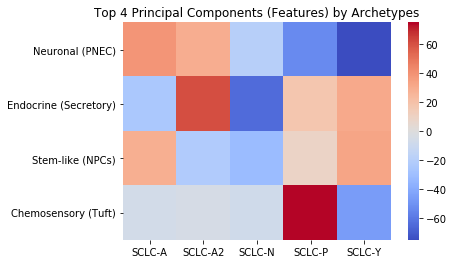

In [33]:
%matplotlib inline
arc_hm = arc_pc.iloc[0:4]
arc_hm.index = ['Neuronal (PNEC)','Endocrine (Secretory)','Stem-like (NPCs)', 'Chemosensory (Tuft)']
sns.heatmap(arc_hm, cmap='coolwarm', vmin = -75, vmax = 75,)
plt.title('Top 4 Principal Components (Features) by Archetypes')
plt.show()

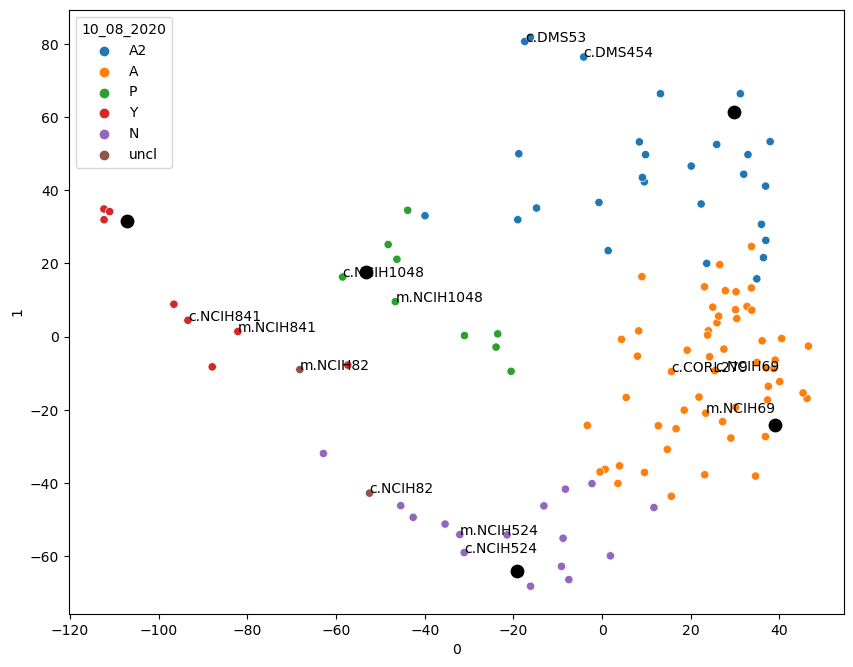

In [34]:
clines = pd.read_csv(op.join(bulkdir,"arc_space/combined_clusters_2020-05-27-MC copy.csv"), index_col = 0)

pcs = pd.read_csv(op.join(bulkdir,"arc_space/pc.csv"), header = None)
pcs.index = clines.index
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], hue = clines['10_08_2020'])
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
for (x,y, label) in zip(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]],clines.index):
    try:
        if label.split('.')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
        elif label.split('.NCI')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
    except IndexError: pass


In [35]:
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
sc_pc_genes = sorted(list(set(adata.var_names).intersection(pc_loadings.index)))
sc_pc_loadings = pc_loadings.loc[sc_pc_genes]
sc_arc_genes = arc.loc[sc_pc_genes]
sc_arc_genes = sc_arc_genes / np.linalg.norm(sc_arc_genes, axis=0)

pca = PCA(n_components=4)
sc_arc_genes_pc = pca.fit_transform(sc_arc_genes.T)

loadings = pd.DataFrame(pca.components_.T,index=sc_pc_genes)

sc_data = data[sc_pc_genes]
adata_df = pd.DataFrame(adata.X.todense(), index=adata.obs_names, columns=adata.var_names)
adata_df = adata_df[sc_pc_genes]
adata_df = adata_df.T
adata_df_scale = adata_df / np.linalg.norm(adata_df, axis=0)
# pd.DataFrame(pp.scale(adata_df.T), columns = sc_pc_genes).T
adata_arc = loadings.T.dot(adata_df_scale)


In [36]:
sc_arc_genes_pc = pd.DataFrame(sc_arc_genes_pc.T)

In [37]:
df['cluster2'] = [str(i) for i in df['cluster2']]

In [38]:
all_df = (pd.DataFrame(columns=['cluster'], index = adata_arc.columns))
all_df['cluster'] = df['cluster2']

In [39]:
all_df = all_df.fillna('Specialist')

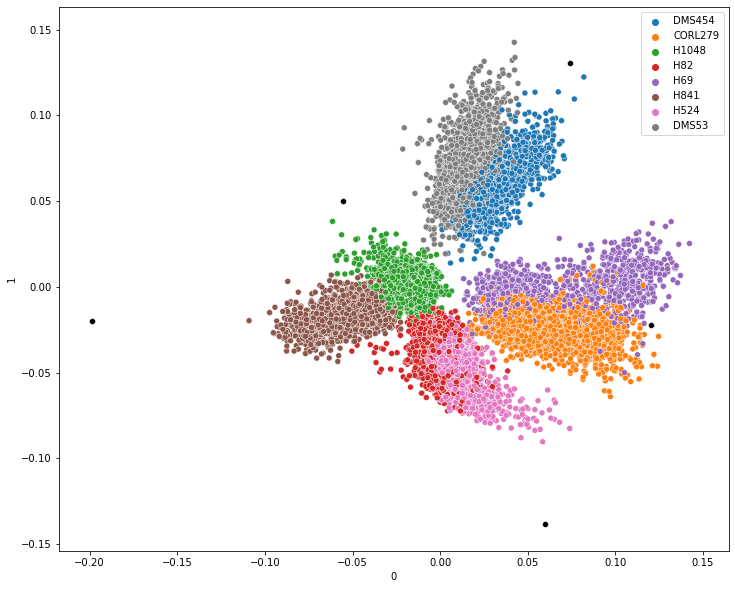

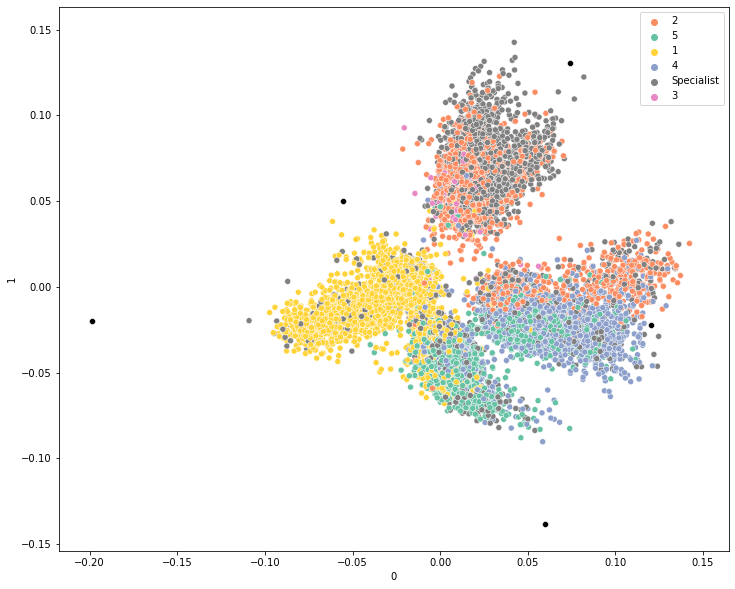

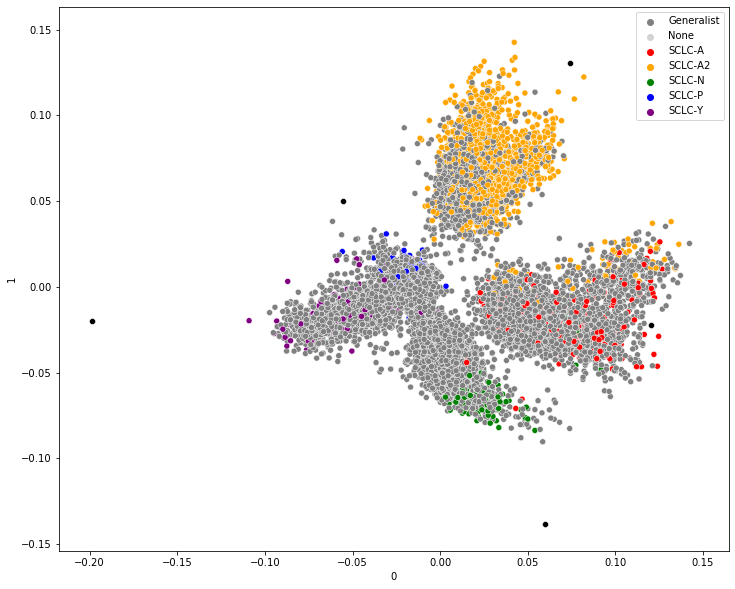

In [42]:
plt.figure(figsize = (12,10))
sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  adata.obs['cline'])#adata.obs['cline'].values)
sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')

plt.figure(figsize = (12,10))
sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  all_df['cluster'], 
                palette = [cp[0],cp[1],cp[2],cp[3],'grey',cp[4]])#adata.obs['cline'].values)
sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')


plt.show()
plt.figure(figsize = (12,10))
sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  adata.obs['Phenotype'].values,
               palette = ['grey','lightgrey','red','orange','green','blue','purple'])#
sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')


In [47]:
adata.write_h5ad('../int/clines/adata06.h5ad')

## Network inference: Imputation of time points

In [40]:
mb.pp.magic_recipe(adata,tfs, 'Phenotype_filtered', fname='cline')


Calculating MAGIC...
  Running MAGIC on 16671 cells and 18265 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 9.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 5.19 seconds.
    Calculating affinities...
    Calculated affinities in 5.23 seconds.
  Calculated graph and diffusion operator in 20.22 seconds.
  Calculating imputation...
  Calculated imputation in 0.13 seconds.
Calculated MAGIC in 23.50 seconds.
Calculating PCA...
Calculated PCA in 9.85 seconds.
Calculating imputation...
Calculated imputation in 0.10 seconds.


In [ ]:
fname = 'cline_nomagic'
clusters = 'Phenotype_filtered'
genes = sorted(list(set(tfs).intersection(set(adata.var_names))))
adata.layers['t0'] = adata.layers['Ms']
adata.layers['t1'] = scv.utils.get_extrapolated_state(adata)

t0 = pd.DataFrame(adata[:, genes].layers['t0'], index=adata.obs_names, columns=genes)
t0.to_csv(f'./out/t0_{fname}.csv')
print(t0.head())
t1 = pd.DataFrame(adata[:, genes].layers['t1'], index=adata.obs_names, columns=genes)
t1.to_csv(f'./out/t1_{fname}.csv')
print(t1.head())
network_clusters = pd.DataFrame(adata.obs[clusters])
network_clusters.to_csv(f'./out/{fname}_clusters.csv')


## EMT Signature

In [ ]:
emt = pd.read_csv('Lung EMT signature.csv', header = 0, index_col = 0)


In [52]:
sc.tl.score_genes(adata, gene_list=emt.loc[emt['Group']=='M'].index, score_name='M')
sc.tl.score_genes(adata, gene_list=emt.loc[emt['Group']=='E'].index, score_name='E')

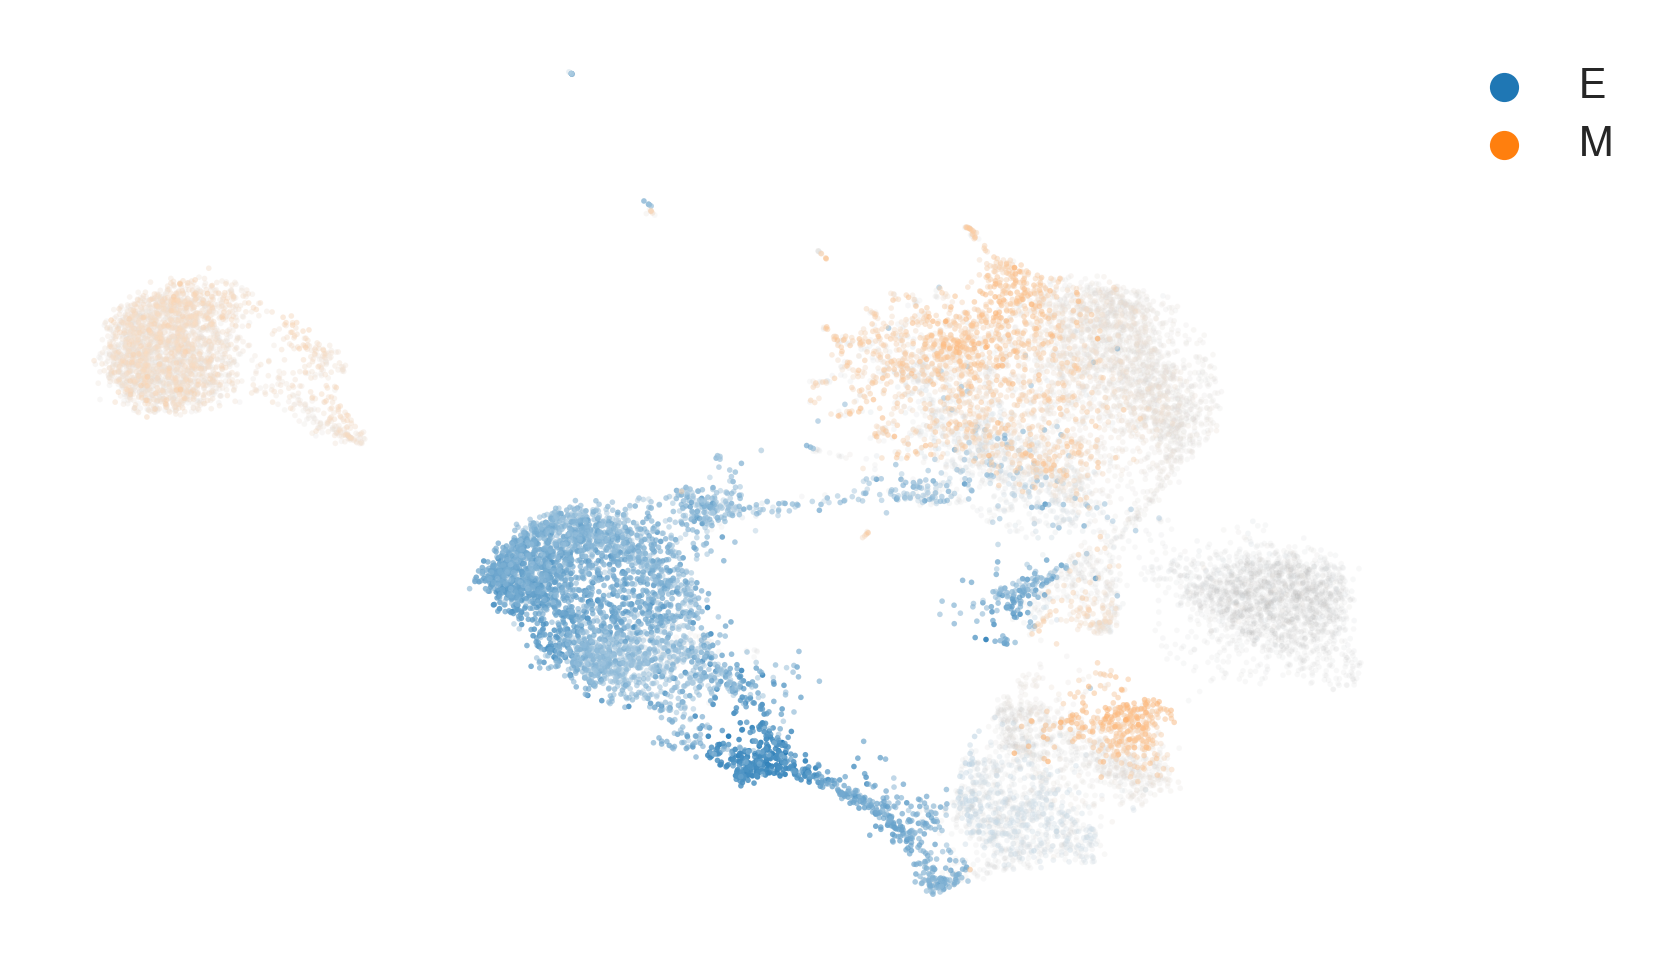

In [54]:
scv.pl.umap(adata, color_gradients=['E','M'], smooth = True, perc = [5,95], dpi = 300)

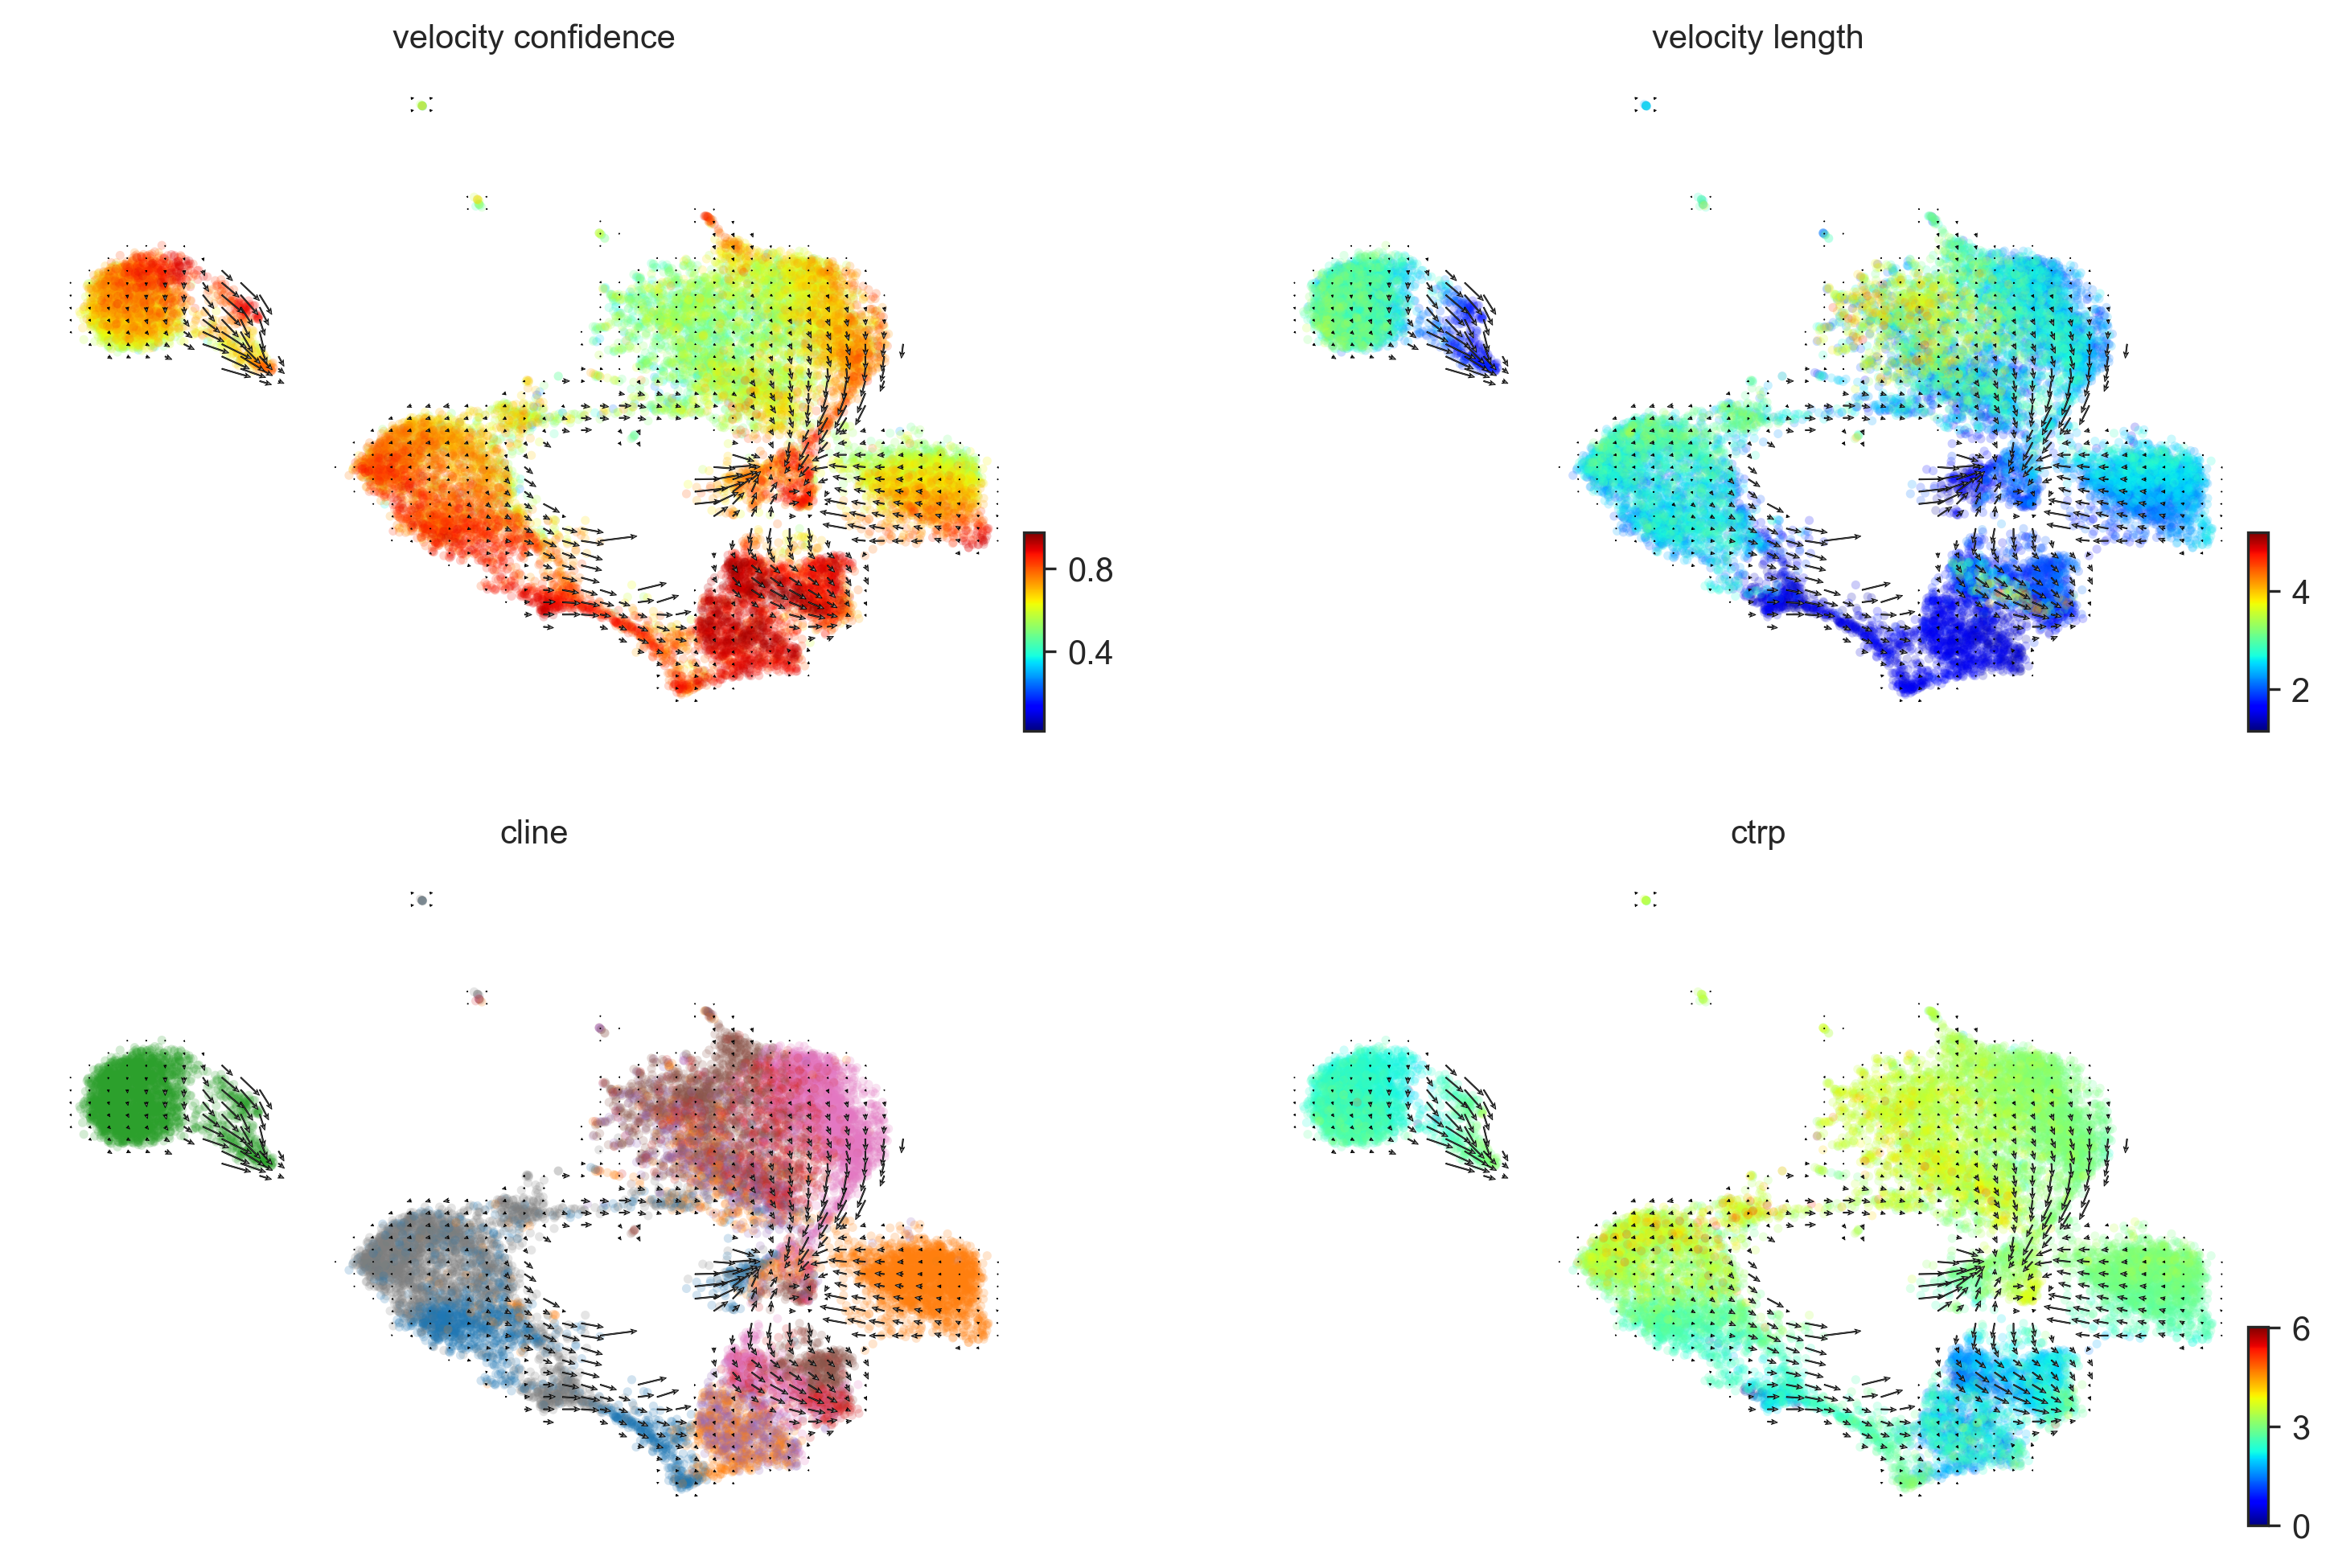

In [89]:
scv.pl.velocity_embedding_grid(adata, color = ['velocity_confidence','velocity_length','cline', 'ctrp'], dpi = 300, ncols=2, cmap = 'jet')

## Notch

In [3]:
adata = sc.read_h5ad('../int/clines/adata05.h5ad')

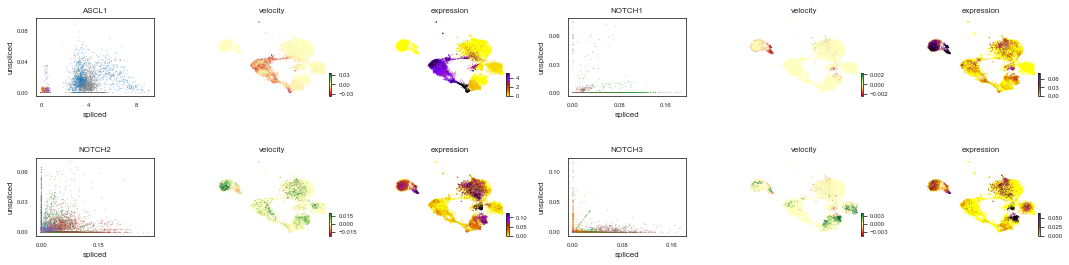

In [6]:
scv.pl.velocity(adata, ['ASCL1',  'NOTCH1', 'NOTCH2', 'NOTCH3','NOTCH4'], ncols=2, color='cline')


In [8]:
scv.tl.recover_dynamics(adata, var_names=['ASCL1',  'NOTCH1', 'NOTCH2', 'NOTCH3','NOTCH4'])

# top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index

# scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False)


recovering dynamics (using 1/16 cores)
    finished (0:00:26) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)

outputs model fit of gene: NOTCH3


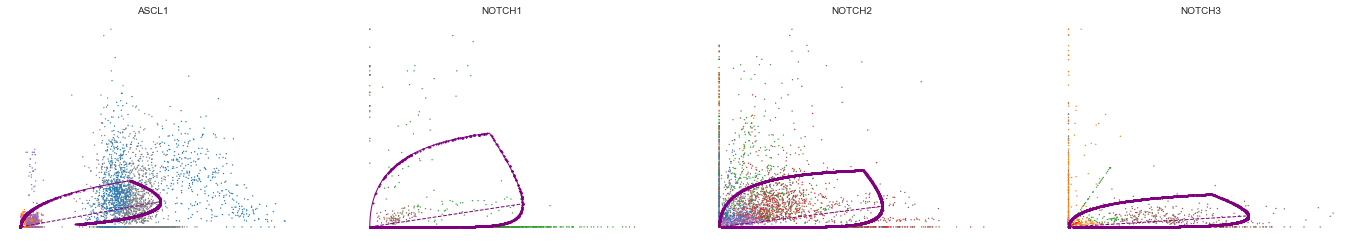

In [11]:
scv.pl.scatter(adata, basis=['ASCL1',  'NOTCH1', 'NOTCH2', 'NOTCH3','NOTCH4'], ncols=5, frameon=False, color = 'cline')
